In [1]:
import numpy as np
import skrf as rf
import matplotlib.pyplot as plt
rf.stylely()

In [2]:
ntw = rf.Network('5WL_8x8.s64p')

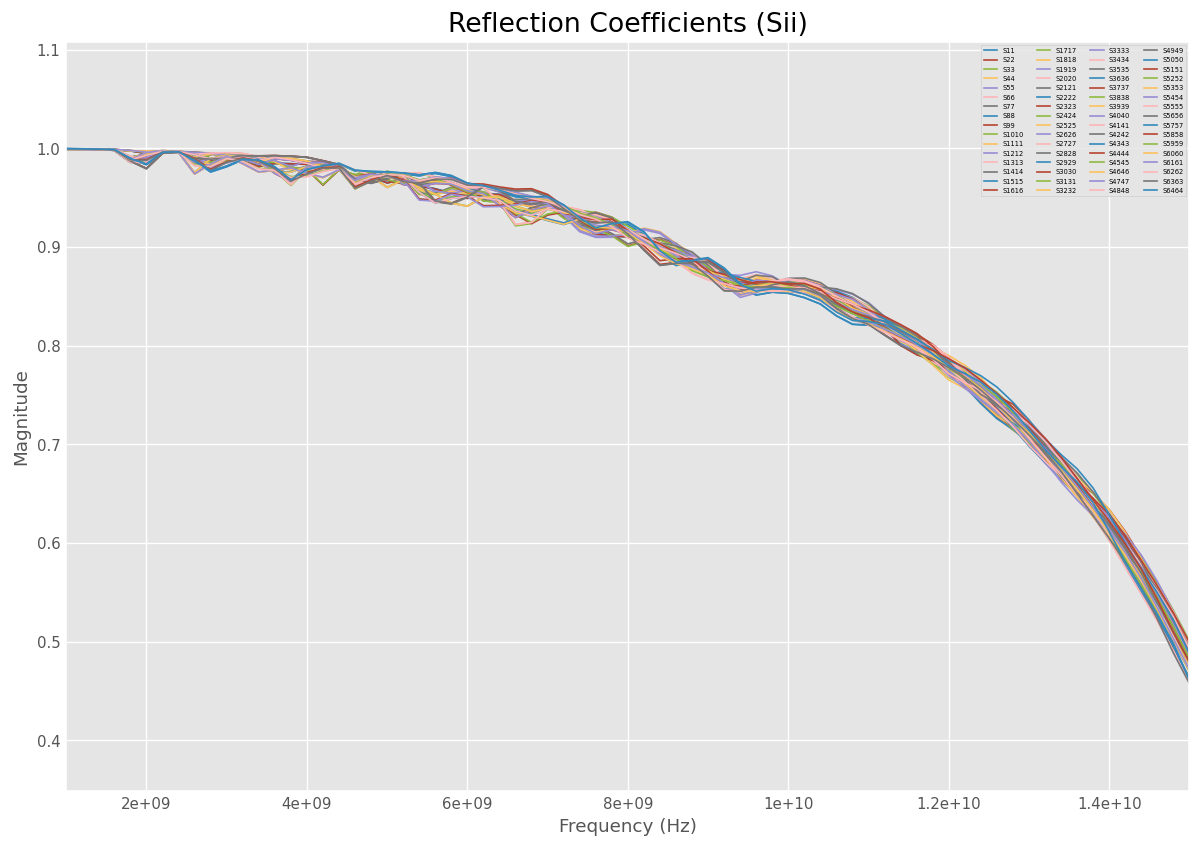

In [3]:
# Plot reflection (Sii) for all 64 ports
plt.figure(figsize=(12, 8))
for i in range(ntw.number_of_ports):
    ntw.plot_s_mag(m=i, n=i, label=f"S{i+1}{i+1}")
plt.title("Reflection Coefficients (Sii)")
plt.legend(ncol=4, fontsize=4)
plt.show()

In [4]:
impedance = ntw.z
freq = ntw.f

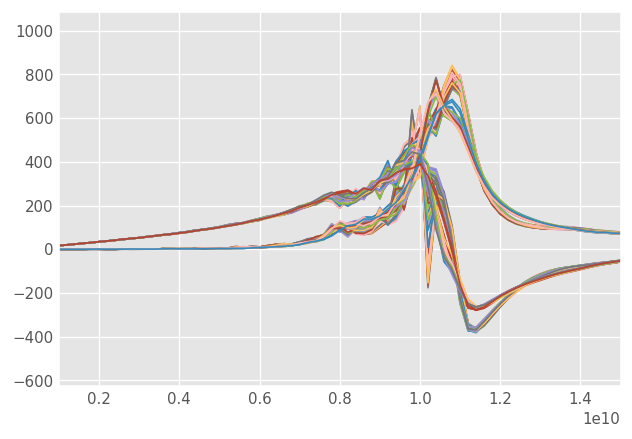

In [5]:
for i in np.arange(0, 64, 1):
    plt.plot(freq, impedance[:, i, i].real, label=f"S{i+1}{i+1}")
    plt.plot(freq, impedance[:, i, i].imag, label=f"S{i+1}{i+1}")

In [6]:
freq[3], impedance[:, i, i][10].real

(1600000000.0, 0.7219505218218316)

R_S < R_L


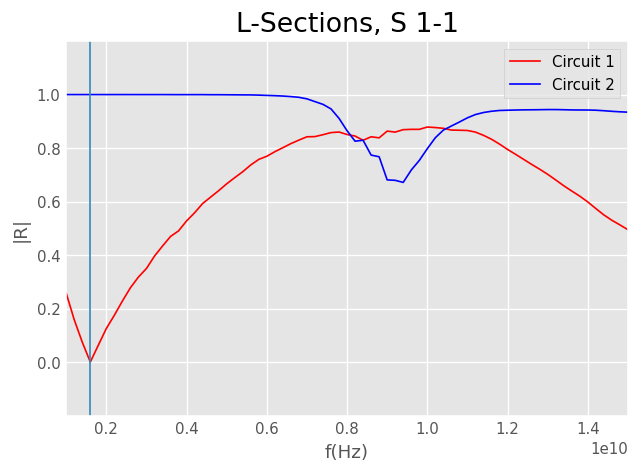

R_S < R_L


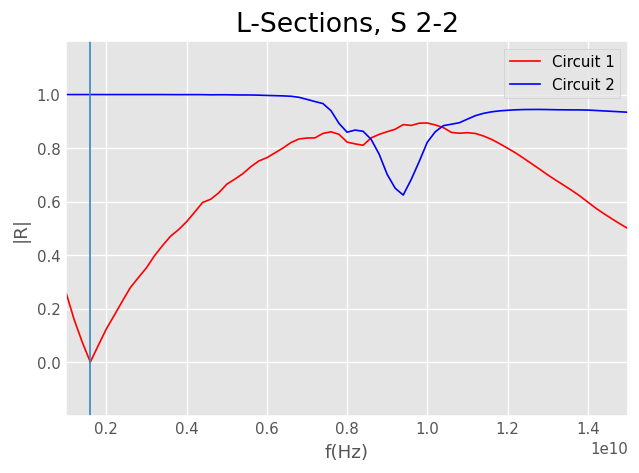

R_S < R_L


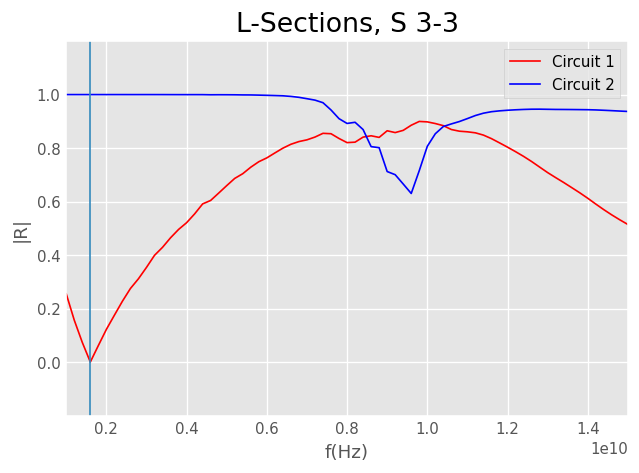

R_S < R_L


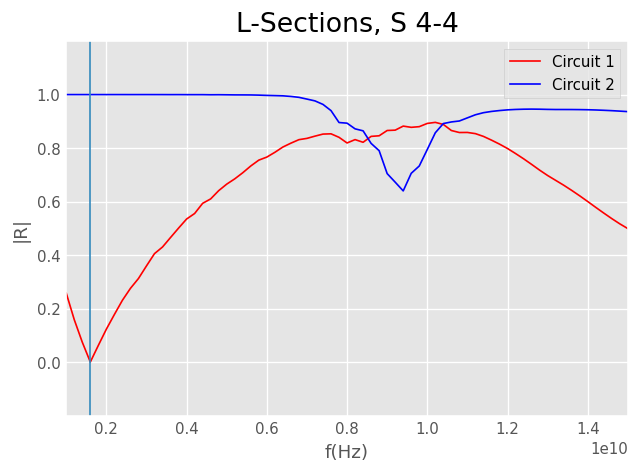

R_S < R_L


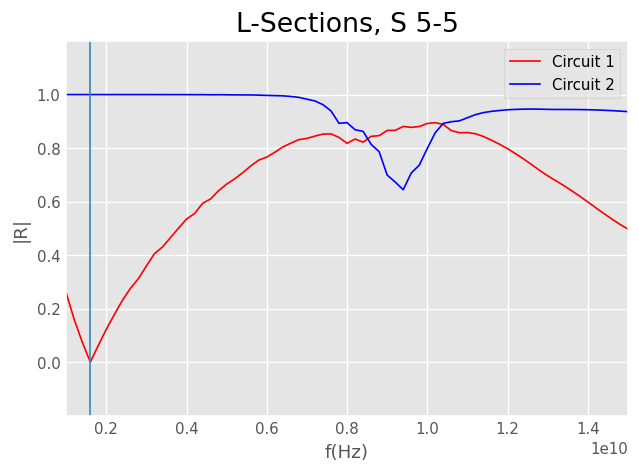

R_S < R_L


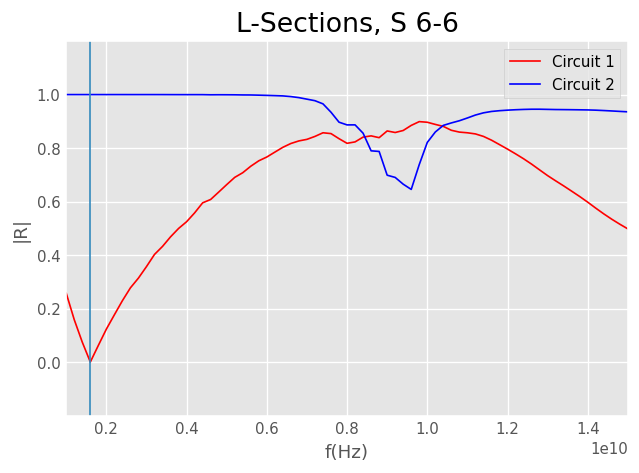

R_S < R_L


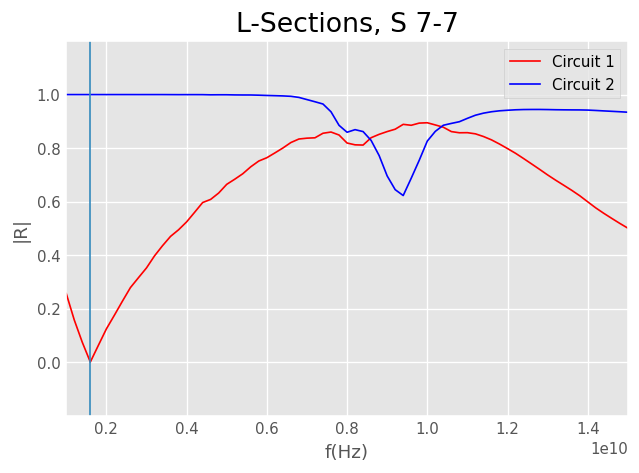

R_S < R_L


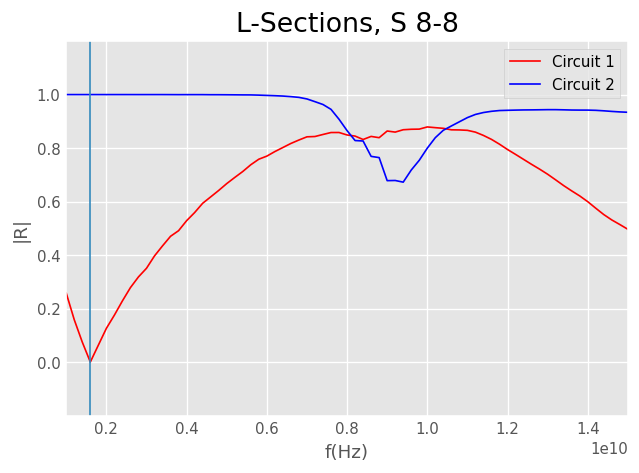

R_S < R_L


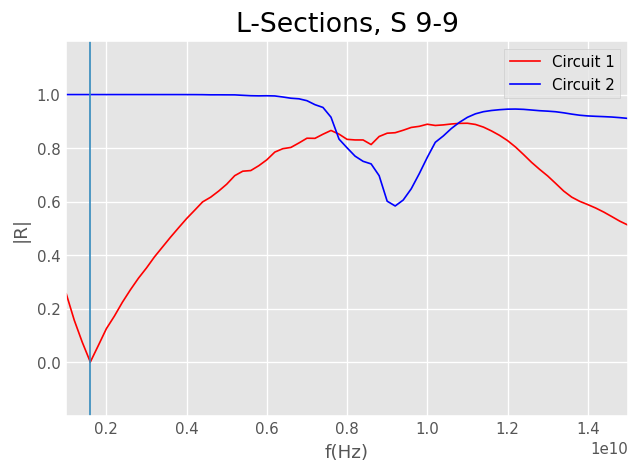

R_S < R_L


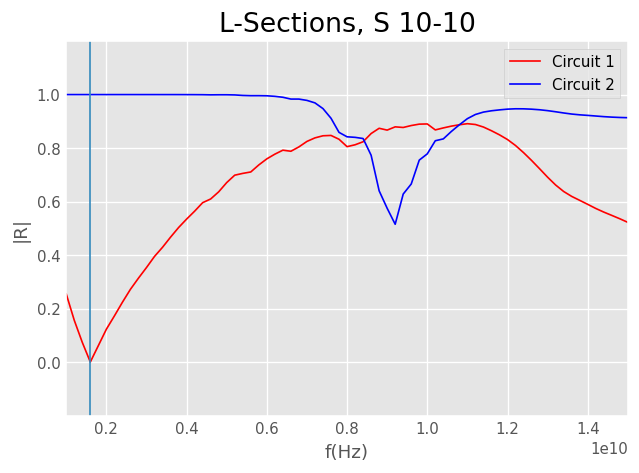

R_S < R_L


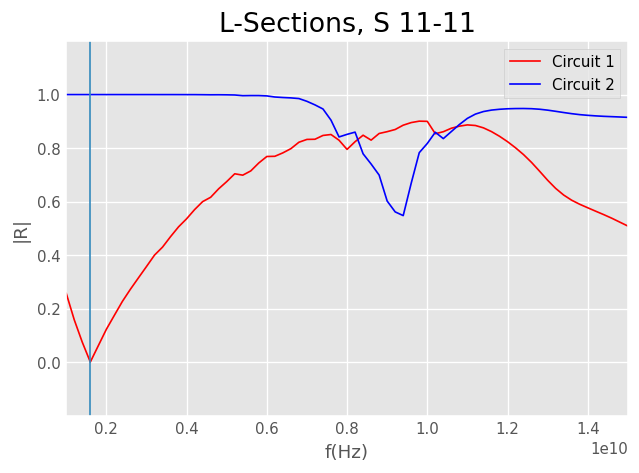

R_S < R_L


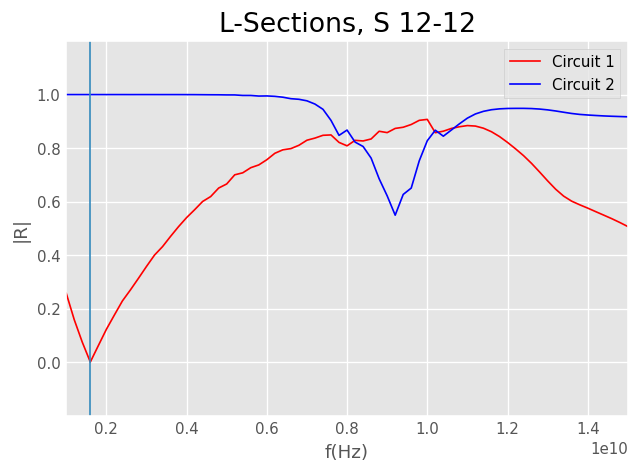

R_S < R_L


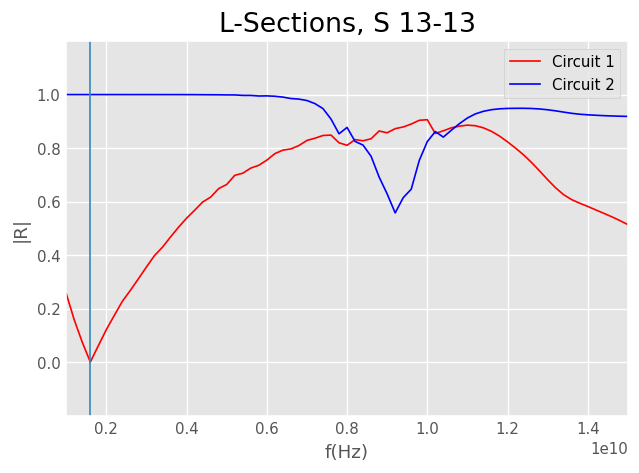

R_S < R_L


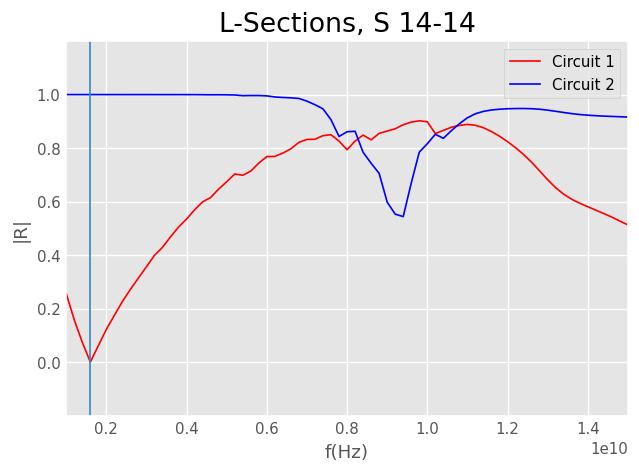

R_S < R_L


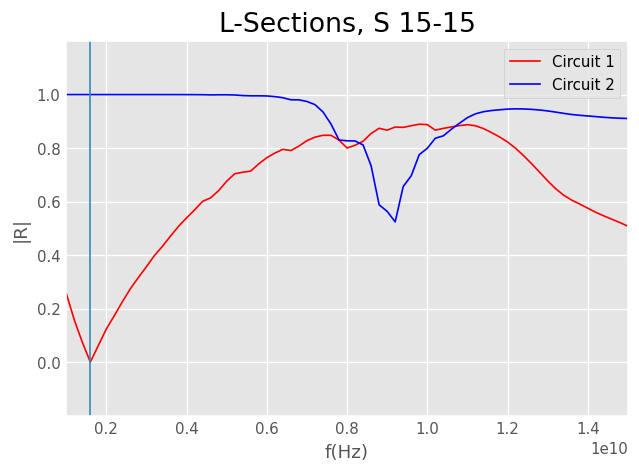

R_S < R_L


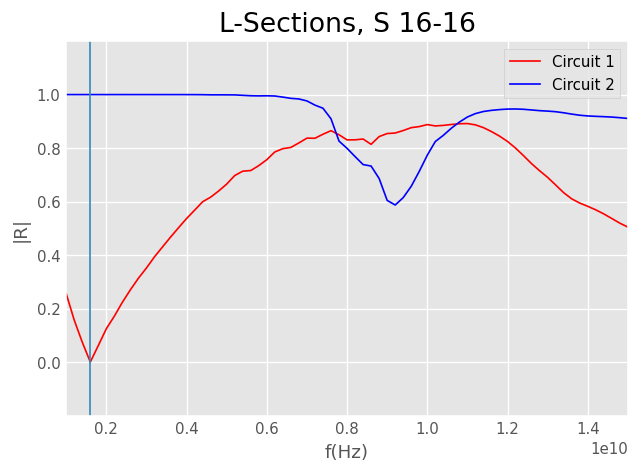

R_S < R_L


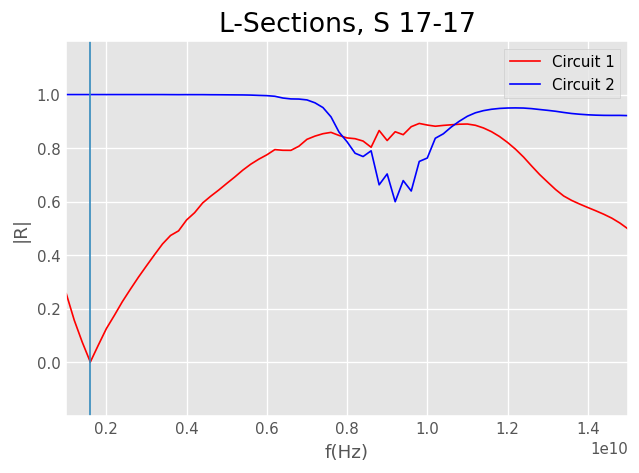

R_S < R_L


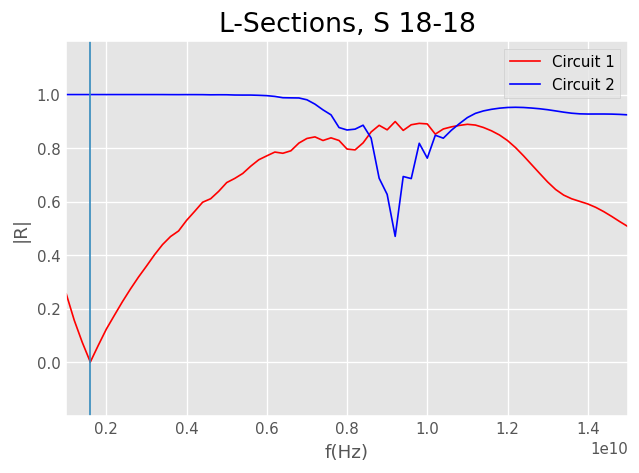

R_S < R_L


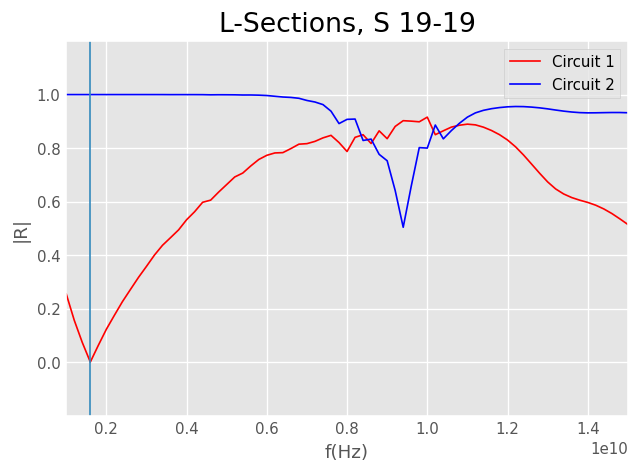

R_S < R_L


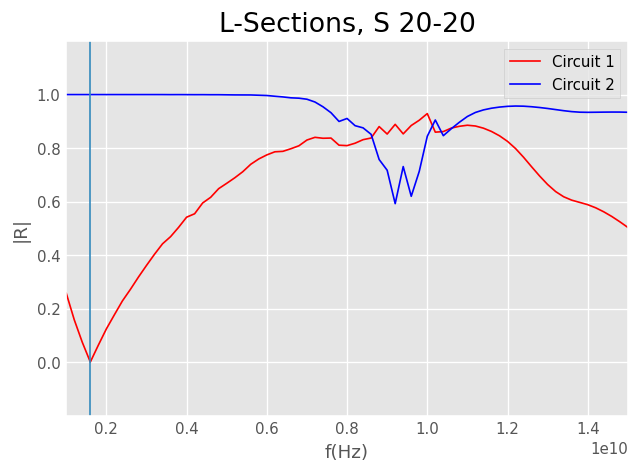

R_S < R_L


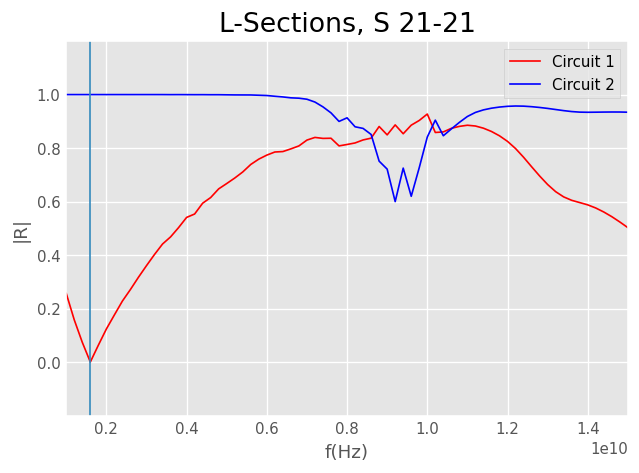

R_S < R_L


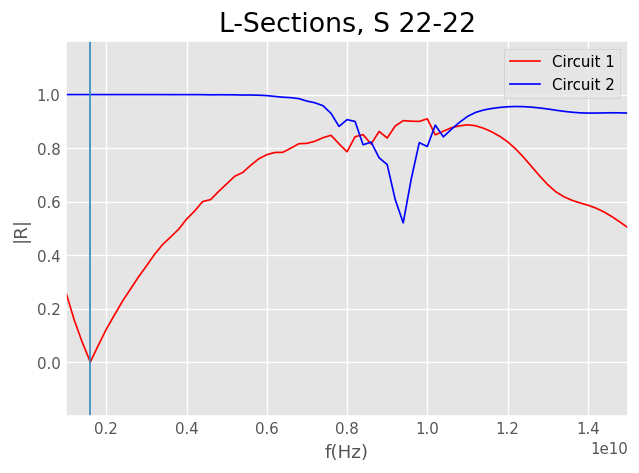

R_S < R_L


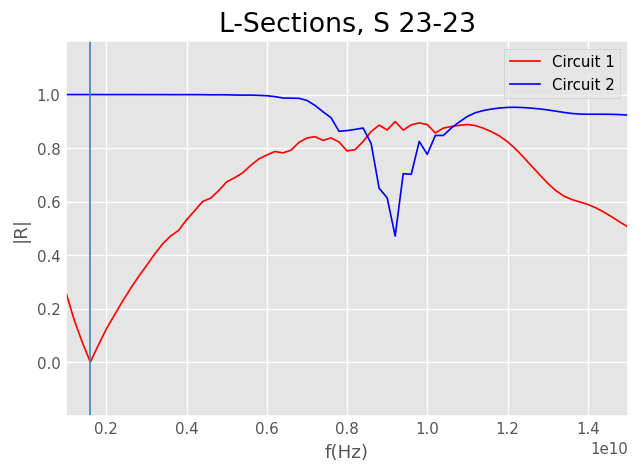

R_S < R_L


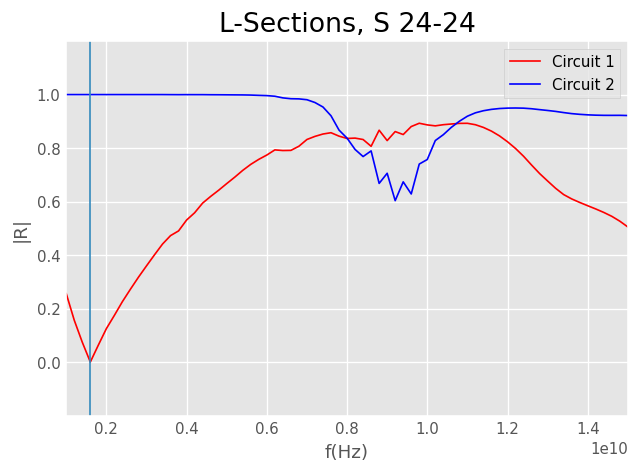

R_S < R_L


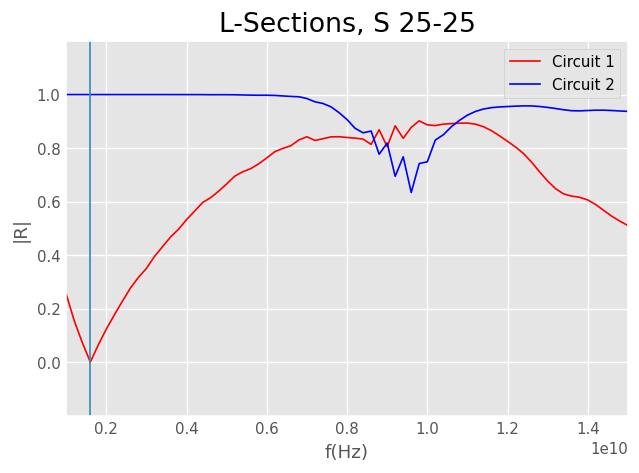

R_S < R_L


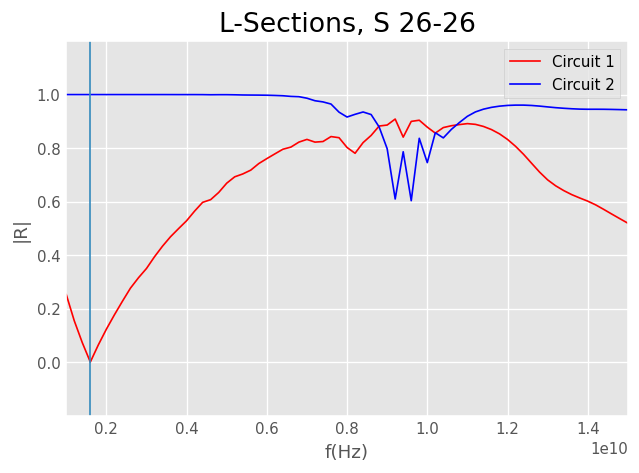

R_S < R_L


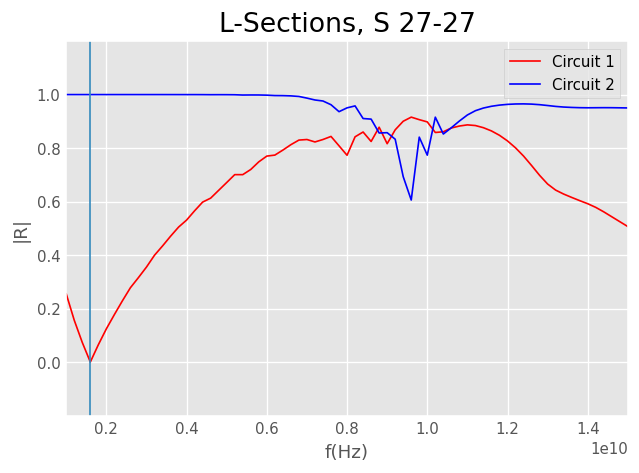

R_S < R_L


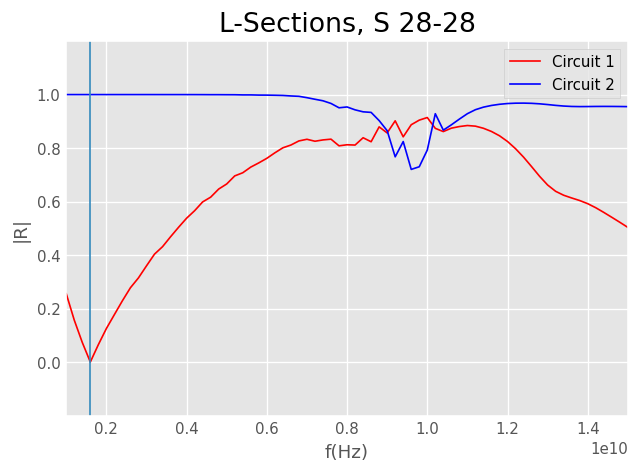

R_S < R_L


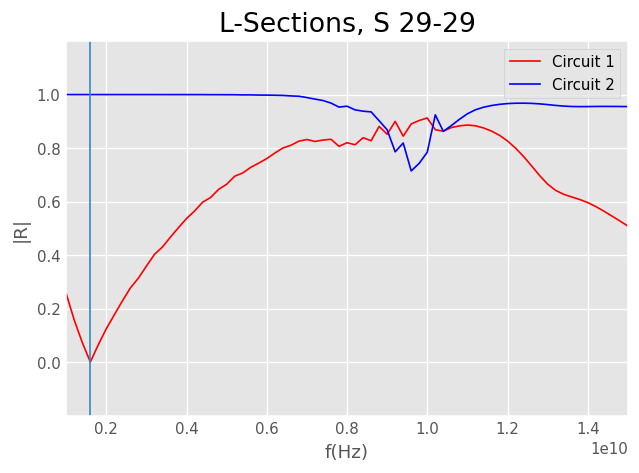

R_S < R_L


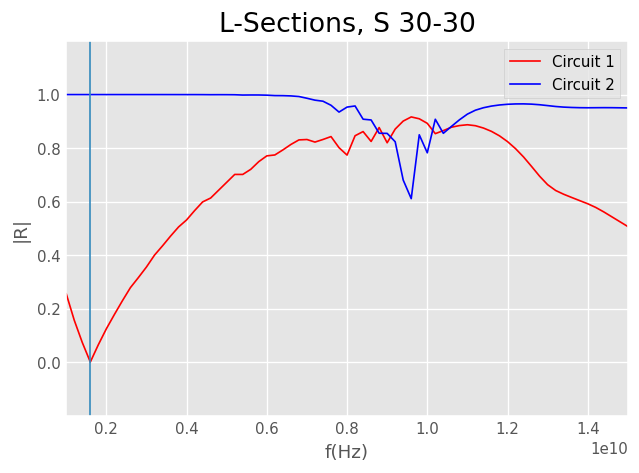

R_S < R_L


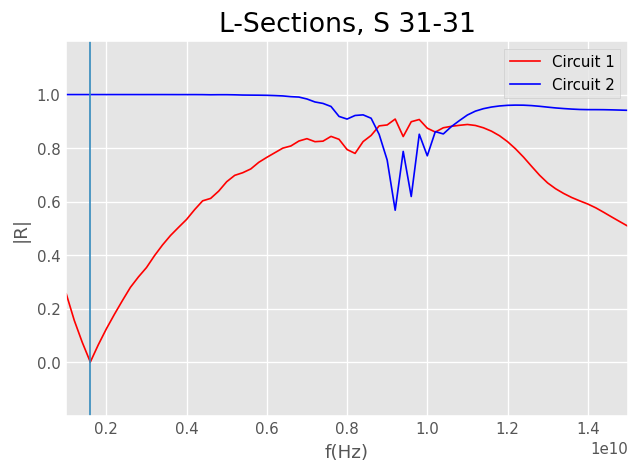

R_S < R_L


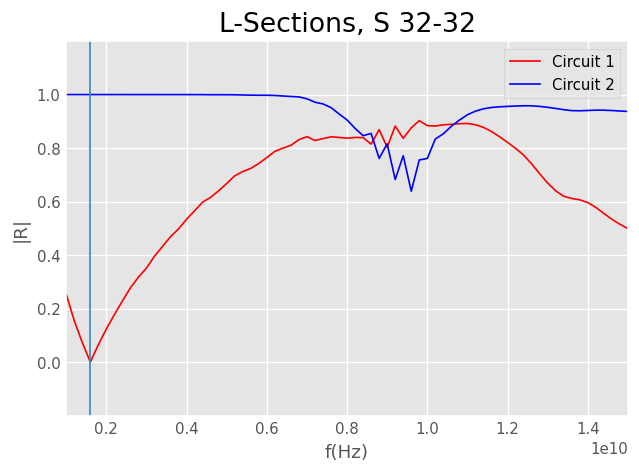

R_S < R_L


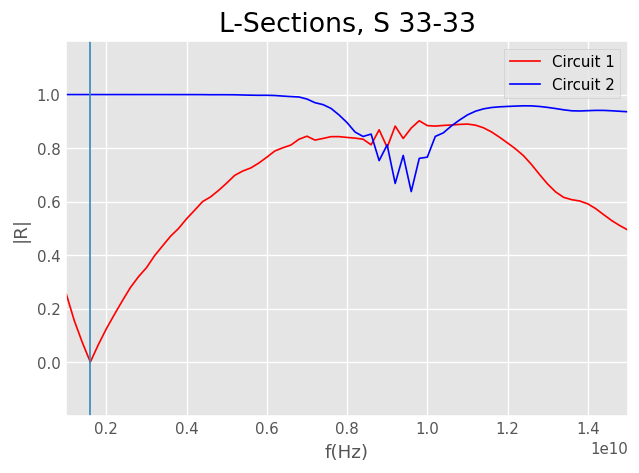

R_S < R_L


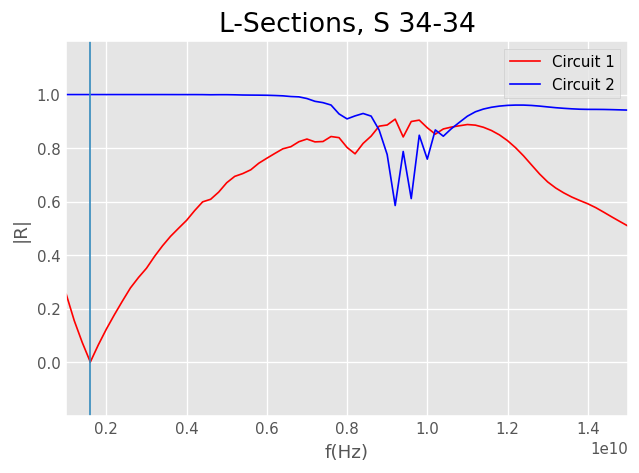

R_S < R_L


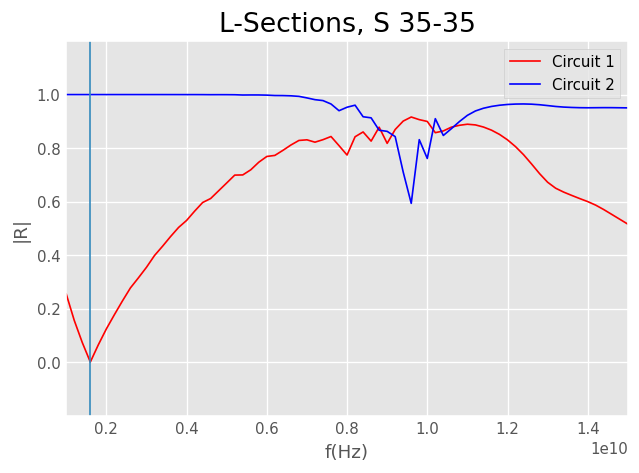

R_S < R_L


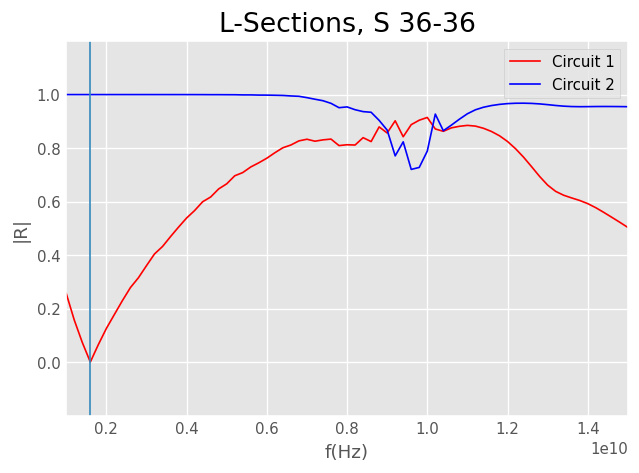

R_S < R_L


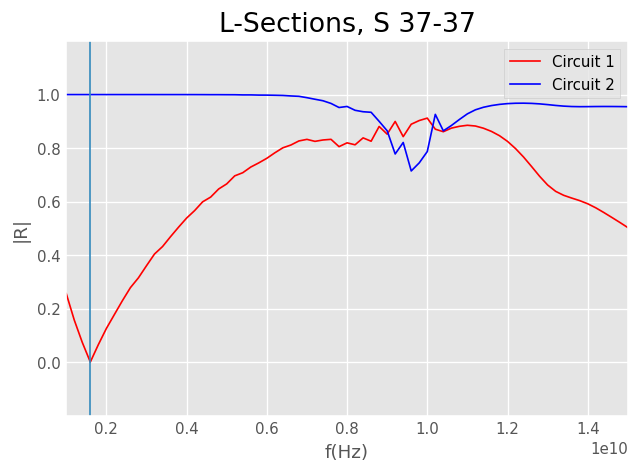

R_S < R_L


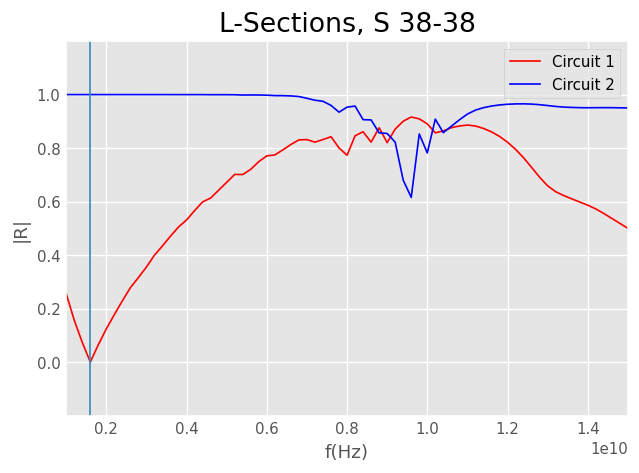

R_S < R_L


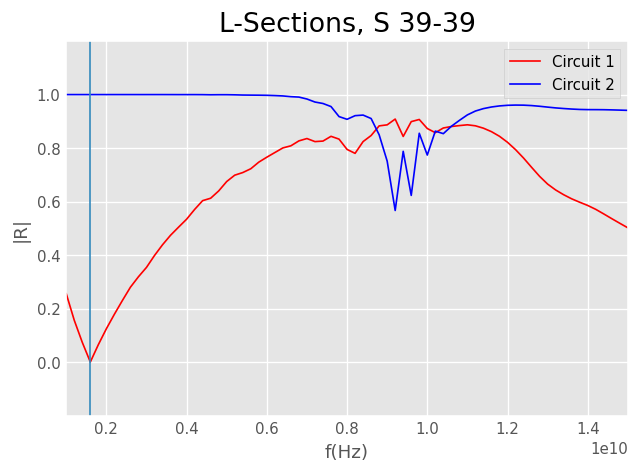

R_S < R_L


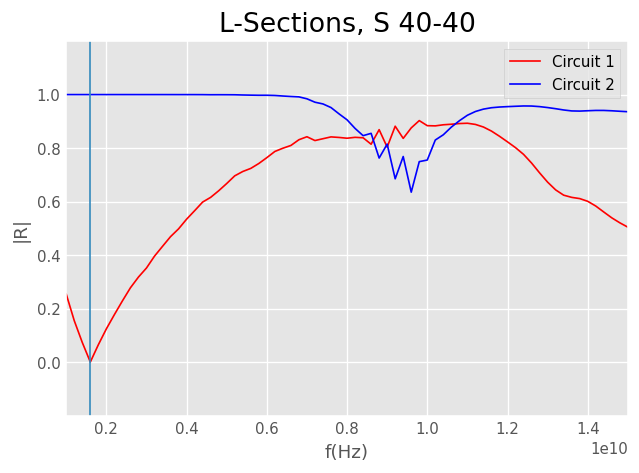

R_S < R_L


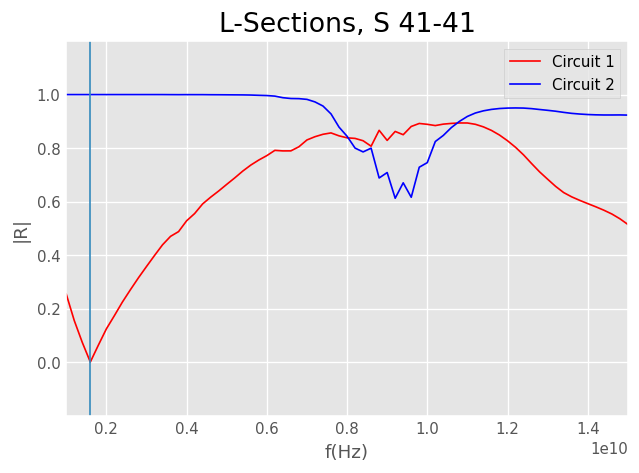

R_S < R_L


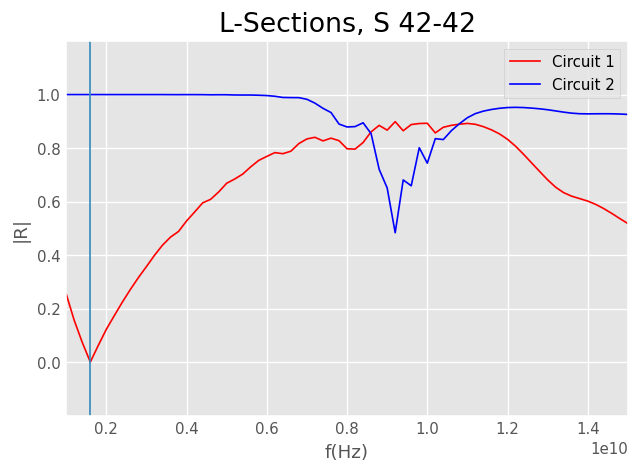

R_S < R_L


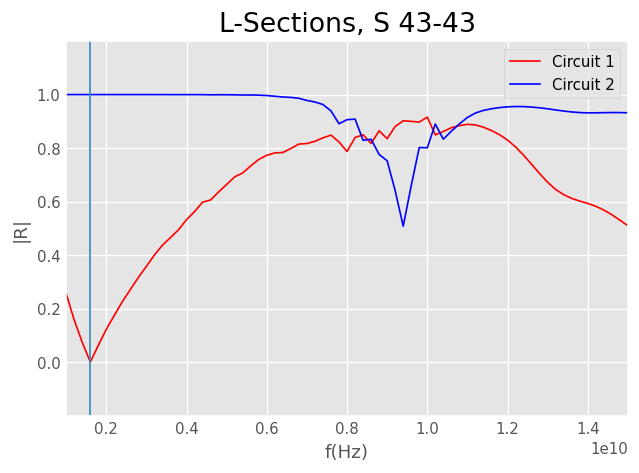

R_S < R_L


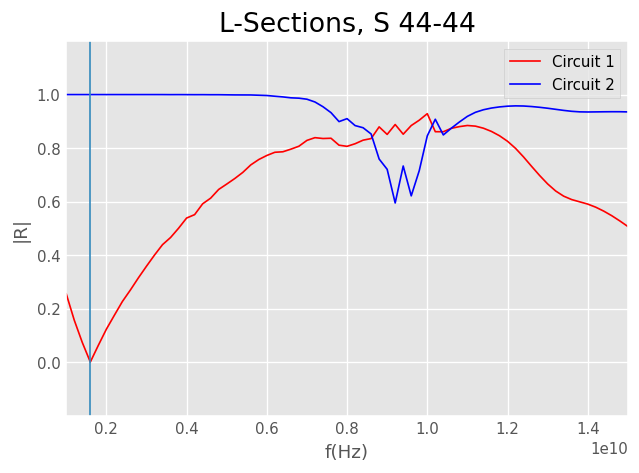

R_S < R_L


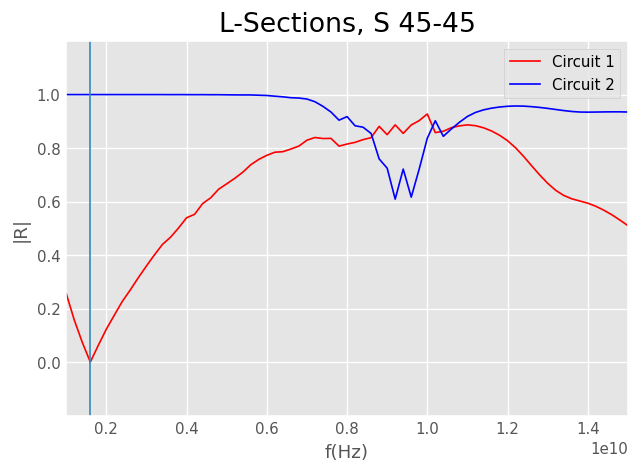

R_S < R_L


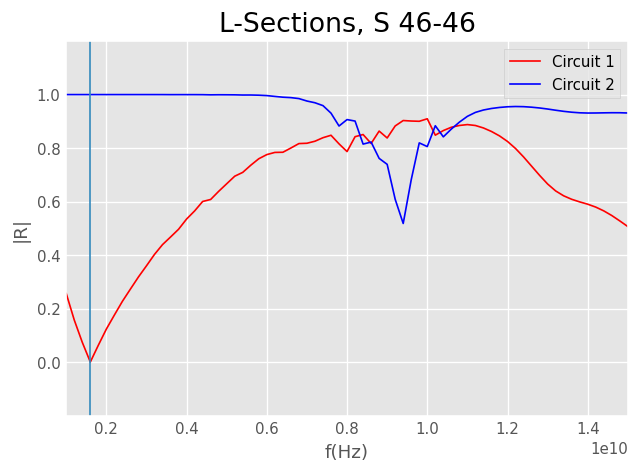

R_S < R_L


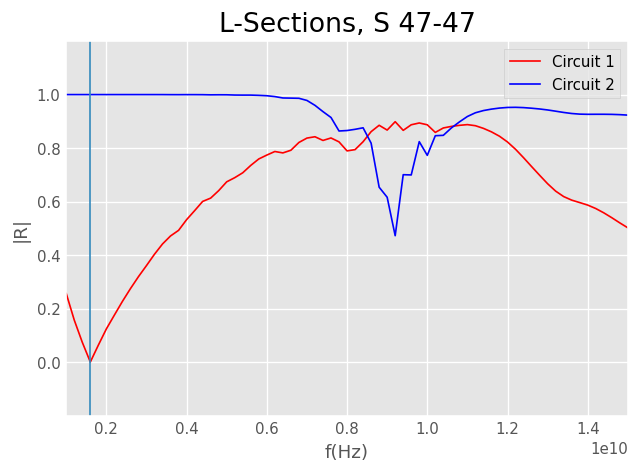

R_S < R_L


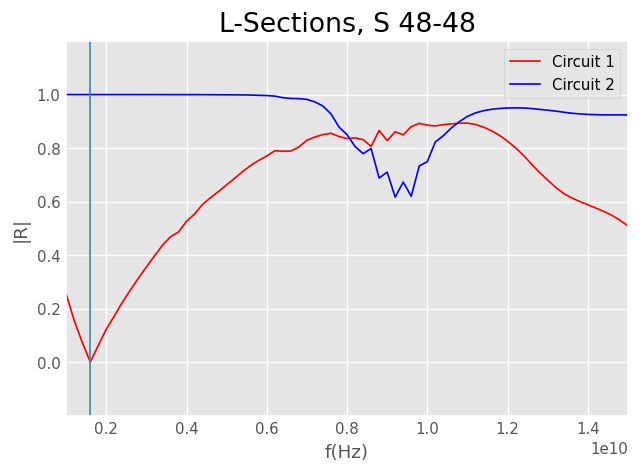

R_S < R_L


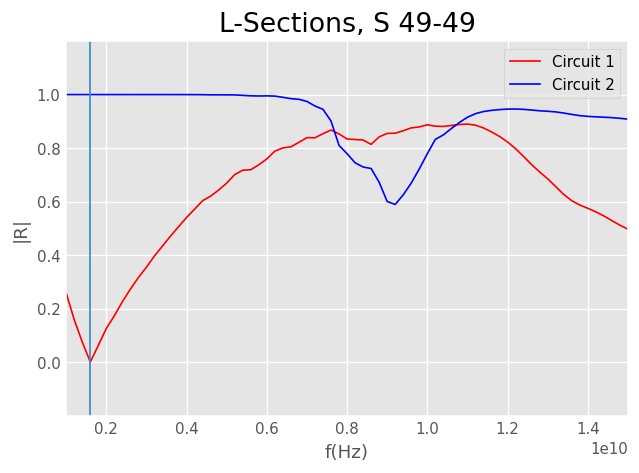

R_S < R_L


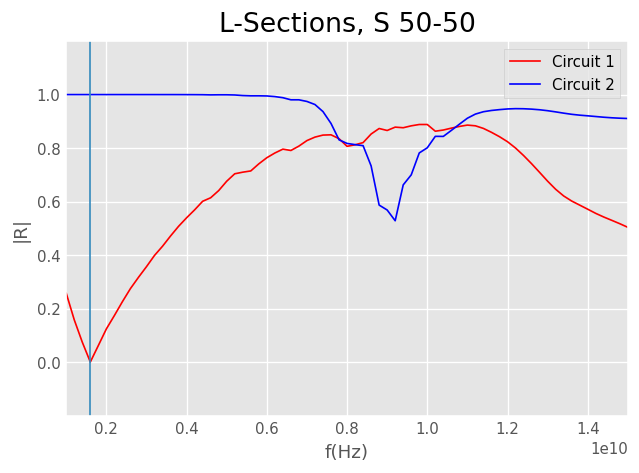

R_S < R_L


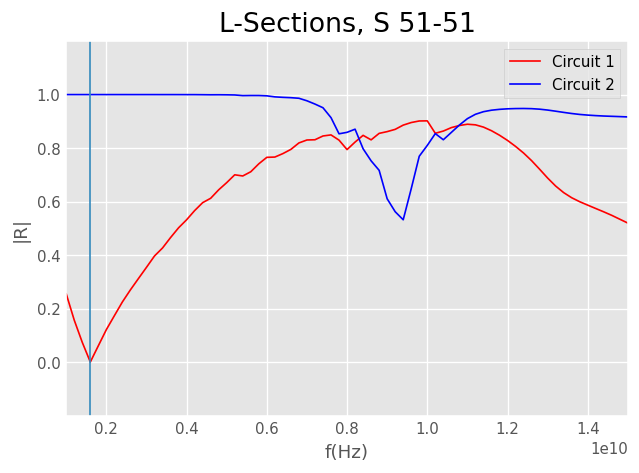

R_S < R_L


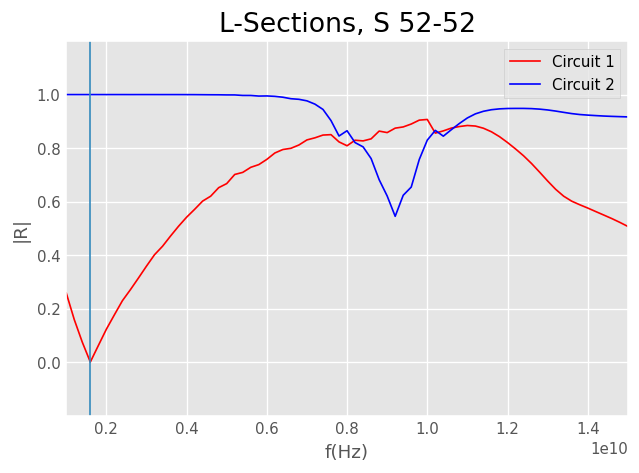

R_S < R_L


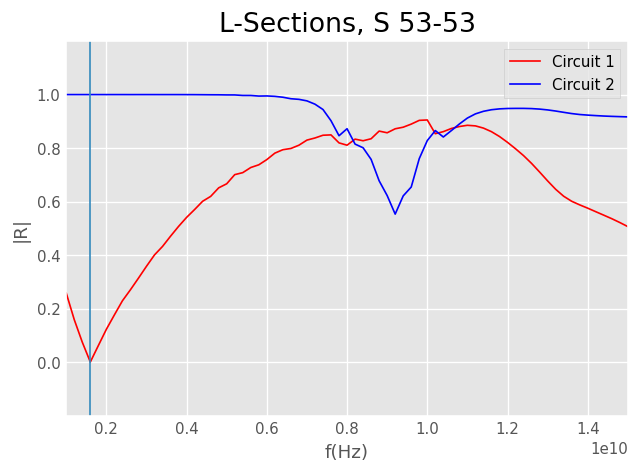

R_S < R_L


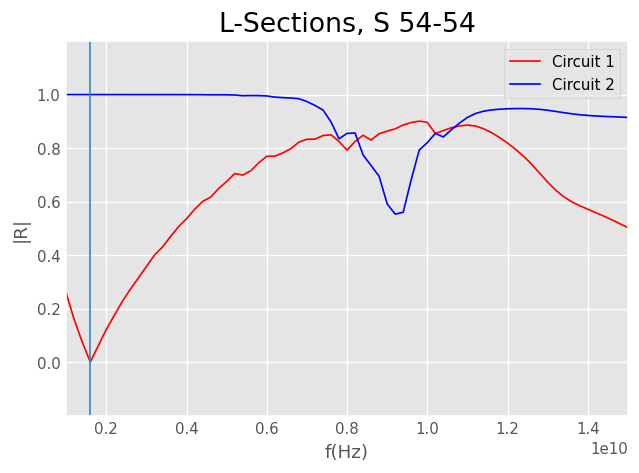

R_S < R_L


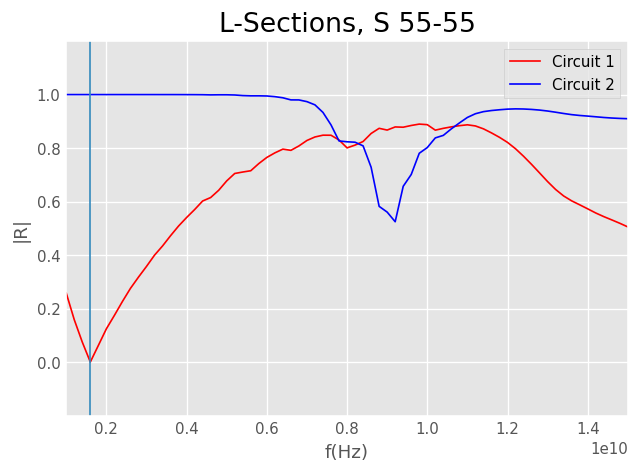

R_S < R_L


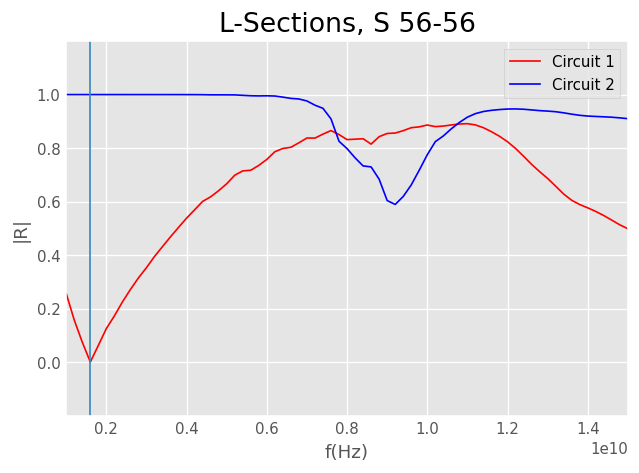

R_S < R_L


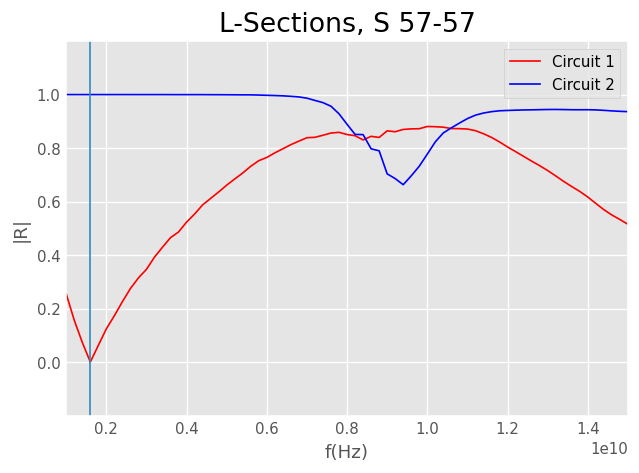

R_S < R_L


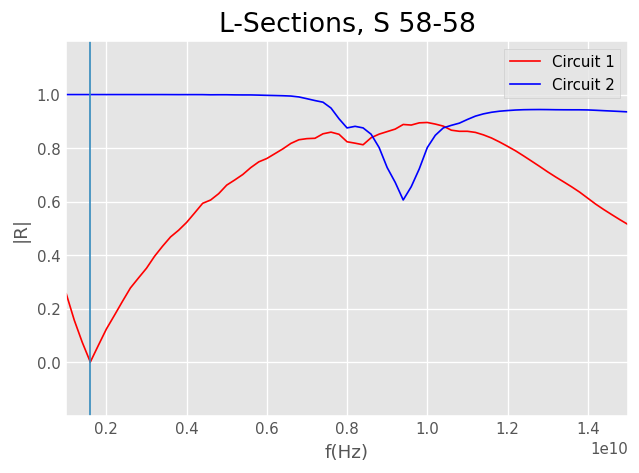

R_S < R_L


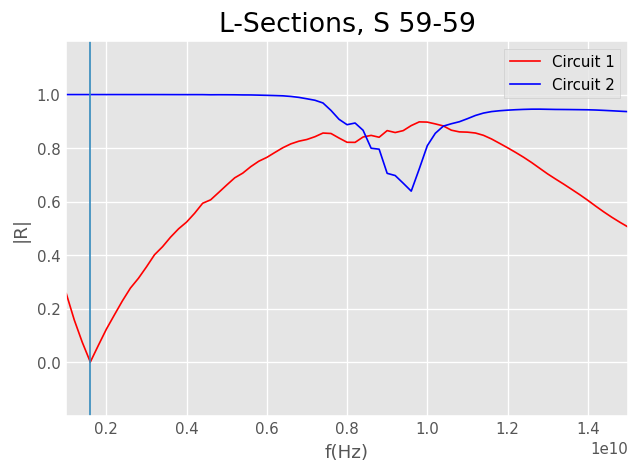

R_S < R_L


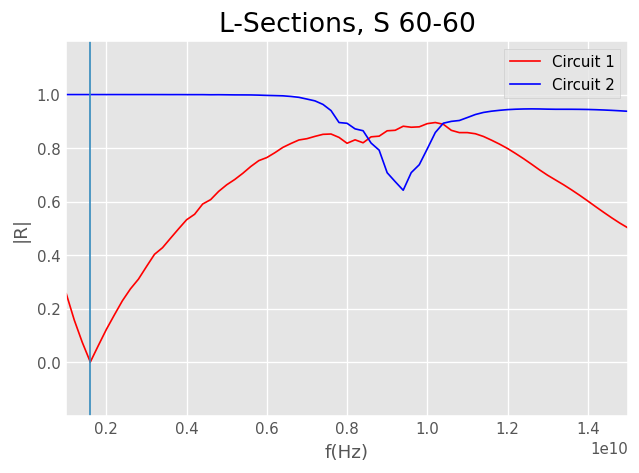

R_S < R_L


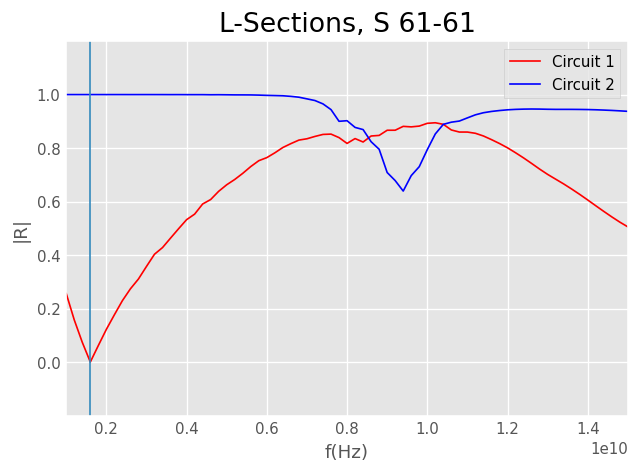

R_S < R_L


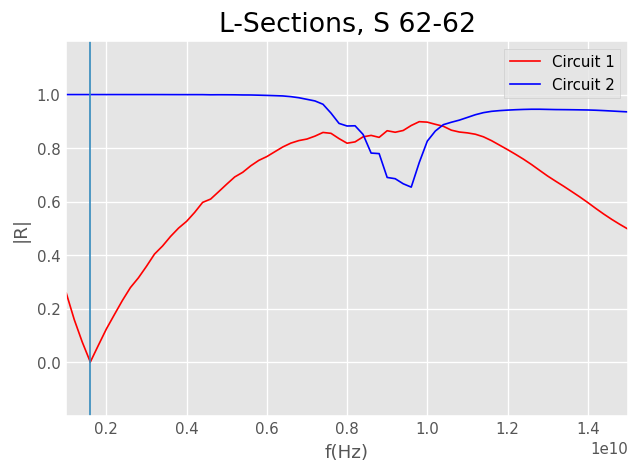

R_S < R_L


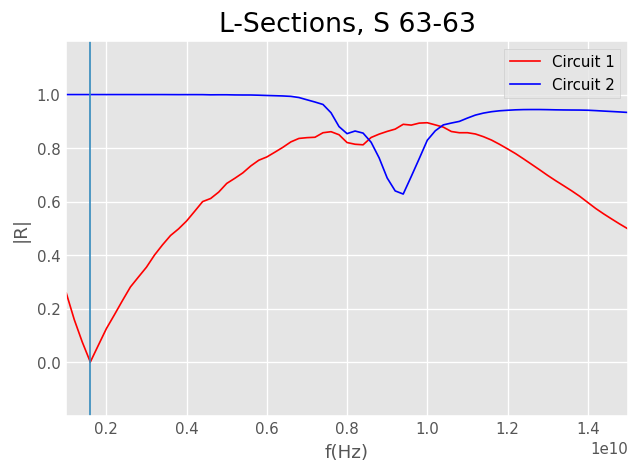

R_S < R_L


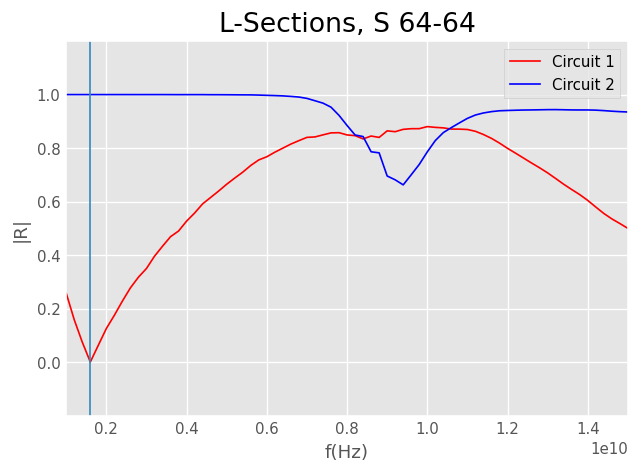

In [15]:
# L Sections
Reflection = []
Coeff = []
C_im = []
C_m = []
L_m = []

for i in np.arange(0, 64, 1):
    R_L = 50
    R_S = impedance[:, i, i][3].real
    X_S = impedance[:, i, i][3].imag
    f = freq[3]
    R_mismatch = 50
    omega = 2*np.pi*freq

    if R_S < R_L:
        Q = np.sqrt(R_L/R_S - 1)
        print('R_S < R_L')
    else:
        Q = np.sqrt(R_S/R_L - 1)
        print('R_S > R_L')
        
    X_s = Q*R_S
    X_p = R_L*Q

    L = X_s/(2*np.pi*f)
    C = 1/(2*np.pi*f*X_p)

    L_imag = np.abs(-X_S/(2*np.pi*f))
    C_imag = np.abs(1/(2*np.pi*f*-X_S))
        
    circuit1_Z = impedance[:, i, i] + 1/(1j*omega*C_imag) + 1j*omega*L + (1j*omega*C + 1/R_L)**(-1)
    circuit2_Z = impedance[:, i, i] + 1/(1j*omega*C_imag) + 1/(1j*omega*C) + (1/(1j*omega*L) + 1/(R_L))**(-1)
    circuit3_Z = impedance[:, i, i] + 1j*omega*L_imag + 1j*omega*L + (1j*omega*C + 1/R_L)**(-1)
    circuit4_Z = impedance[:, i, i] + 1j*omega*L_imag + 1/(1j*omega*C) + (1/(1j*omega*L) + 1/(R_L))**(-1)

    Reflection1 = np.abs((circuit1_Z - R_mismatch)/(circuit1_Z + R_mismatch))
    Reflection2 = np.abs((circuit2_Z - R_mismatch)/(circuit2_Z + R_mismatch))
    Reflection3 = np.abs((circuit3_Z - R_mismatch)/(circuit3_Z + R_mismatch))
    Reflection4 = np.abs((circuit4_Z - R_mismatch)/(circuit4_Z + R_mismatch))

    C_im.append(C_imag)
    #Reflection.append()
    Coeff.append([i])
    C_m.append(C)
    L_m.append(L)
    

    plt.figure()
    plt.plot(freq, Reflection1, color='r', label='Circuit 1')
    plt.plot(freq, Reflection2, color='b', label='Circuit 2')
    #plt.plot(freq, Reflection3, color='g', label='Circuit 3')
    #plt.plot(freq, Reflection4, color='k', label='Circuit 4')
    plt.legend()
    plt.axvline(x=f)
    plt.ylabel("|R|")
    plt.xlabel("f(Hz)")
    plt.title(f"L-Sections, S {i+1}-{i+1}")
    plt.show()

In [ ]:
plt.scatter(Coeff, C_im, label=f'STD = {np.std(C_im)}')
plt.title(f'Cancel Capacitor (1.6 GHz), AVG = {np.average(C_im)}')
plt.xlabel('Reflection Coefficient')
plt.ylabel('Capacitance (F)')
plt.legend()

In [ ]:
plt.scatter(Coeff, C_m, label=f'STD = {np.std(C_m)}')
plt.title(f'Matching Capacitor (1.6 GHz), AVG = {np.average(C_m)}')
plt.xlabel('Reflection Coefficient')
plt.ylabel('Capacitance (F)')
plt.legend()

In [ ]:
plt.scatter(Coeff, L_m, label = f'STD = {np.std(L_m)}')
plt.title(f'Matching Inductor (1.6 GHz), AVG = {np.average(L_m)}')
plt.xlabel('Reflection Coefficient')
plt.ylabel('Inductance (H)')
plt.legend()

In [ ]:
def parallel(x, y):
    return (1/x + 1/y)**(-1)
def capacitor(x):
    return 1/(1j*2*np.pi*freq*x)
def inductor(x):
    return 1j*2*np.pi*freq*x

L_imag = np.abs(-X_S/(2*np.pi*f))
C_imag = np.abs(1/(2*np.pi*f*-X_S))

C_i = capacitor(C_imag)
L_i = inductor(L_imag)

In [ ]:
# Pi Networks
for i in np.arange(0, 64, 1): 
    R_L = 50
    R_S = impedance[:, i, i][3].real
    X_S = impedance[:, i, i][3].imag
    f = freq[3]
    R_mismatch = 50
    omega = 2*np.pi*freq

    R_min = np.sqrt(R_S*R_L)
    Q_new = 27

    if R_S < R_L:
        Q_min = np.sqrt(R_min/R_S - 1)
        print(Q_min)
        R_H = R_L
        R = R_H/(Q_new**2 + 1)
        R_p2 = R_L
        R_s2 = R
        print(R_S/R)
        Q1 = np.sqrt(R_S/R - 1)
        R_p1 = R_S
        R_s1 = R
        print('R_S < R_L')
    else:
        Q_min = np.sqrt(R_S/R_min - 1)
        print(Q_min)
        R_H = R_S
        R = R_H/(Q_new**2 + 1)
        R_p2 = R
        R_s2 = R_S
        print(R_S/R)
        Q1 = np.sqrt(R_L/R - 1)
        R_p1 = R_L
        R_s1 = R
        print('R_S > R_L')


    X_p2 = R_p2/Q_new
    X_s2 = Q_new*R_s2

    X_p1 = R_p1/Q1
    X_s1 = Q1*R_s1

    # option 1: P1 = cap, S1=ind, S2 = ind, P2 = cap
    cap_p1 = 1/(2*np.pi*f*X_p1)
    C_p1 = capacitor(cap_p1)
    ind_s1 = X_s1/(2*np.pi*f)
    L_s1 = inductor(ind_s1)
    ind_s2 = X_s2/(2*np.pi*f)
    L_s2 = inductor(ind_s2)
    cap_p2 = 1/(2*np.pi*f*X_p2)
    C_p2 = capacitor(cap_p2)

    loop1_1 = parallel(C_p2, R_L)
    loop2_1 = loop1_1 + L_s1 + L_s2
    loop3_1 = parallel(C_p1, loop2_1) + C_i + impedance[:, i, i]
    reflection_opt1 = np.abs((loop3_1 - R_mismatch)/(loop3_1 + R_mismatch))
    idx = np.argmin(np.abs(freq - f))
    print(f"Reflection at {freq[idx]:.2f}: {reflection_opt1[idx]:.4f}")

    # option 2: P1=cap, S1 = ind, S2=cap, P2=ind
    cap_s2 = 1/(2*np.pi*f*X_s2)
    C_s2 = capacitor(cap_s2)
    ind_p2 = X_p2/(2*np.pi*f)
    L_p2 = inductor(ind_p2)

    loop1_2 = parallel(L_p2, R_L)
    loop2_2 = loop1_2 + L_s1 + C_s2
    loop3_2 = parallel(C_p1, loop2_2) + C_i + impedance[:, i, i]
    reflection_opt2 = np.abs((loop3_2 - R_mismatch)/(loop3_2 + R_mismatch))
    print(f"Reflection at {freq[idx]:.2f}: {reflection_opt2[idx]:.4f}")

    # option 3: P1=ind, S1=cap, S2=cap, P2=ind
    cap_s1 = 1/(2*np.pi*f*X_s1)
    C_s1 = capacitor(cap_s1)
    ind_p1 = X_p1/(2*np.pi*f)
    L_p1 = inductor(ind_p1)

    #option 3: L_p1, C_s1, L_p2, C_s2
    loop1_3 = parallel(L_p2, R_L)
    loop2_3 = loop1_3 + C_s1 + C_s2
    loop3_3 = parallel(L_p1, loop2_3) + C_i + impedance[:, i, i]
    reflection_opt3 = np.abs((loop3_3 - R_mismatch)/(loop3_3 + R_mismatch))
    print(f"Reflection at {freq[idx]:.2f}: {reflection_opt3[idx]:.4f}")

    # option 4: P1=ind, S1=cap, S2=ind, P2=cap

    loop1_4 = parallel(C_p2, R_L)
    loop2_4 = loop1_4 + C_s1 + L_s2
    loop3_4 = parallel(L_p1, loop2_4) + C_i + impedance[:, i, i]
    reflection_opt4 = np.abs((loop3_4 - R_mismatch)/(loop3_4 + R_mismatch))
    print(f"Reflection at {freq[idx]:.2f}: {reflection_opt4[idx]:.4f}")

    plt.plot(freq, reflection_opt1, color='k', label='Option 1')
    plt.plot(freq, reflection_opt2, color='r', label='Option 2')
    plt.plot(freq, reflection_opt3, color='b', label='Option 3')
    plt.plot(freq, reflection_opt4, color='g', label='Option 4')
    plt.axvline(x=f)
    plt.ylabel("|R|")
    plt.xlabel("f(Hz)")
    plt.title(f"Pi Network, S {i+1}-{i+1}")
    plt.legend(loc="upper right")
    plt.show()

In [ ]:
# Broad Band Network
for i in np.arange(0, 64, 1):
    R_L = 50
    R_S = impedance[:, i, i][3].real
    X_S = impedance[:, i, i][3].imag
    f = freq[3]
    R_mismatch = 50
    omega = 2*np.pi*freq
    
    if R_S < R_L:
        print('R_S < R_L')
        Q_wide = Q_min
        R_wide = R_L/(Q_wide**2 + 1)

        R_p1_w = R_wide
        R_s1_w = R_S
        X_p1_w = R_p1_w/Q_wide
        X_s1_w = Q_wide*R_s1_w

        R_p2_w = R_L # shunt resistance
        R_s2_w = R_wide # series resistance (virtual in this instance)
        X_p2_w = R_p2_w/Q_wide
        X_s2_w = Q_wide*R_s2_w

        cap_p1_w = 1/(2*np.pi*f*X_p1_w)
        C_p1_w = capacitor(cap_p1_w) # ohms
        ind_p1_w = X_p1_w/(2*np.pi*f)
        L_p1_w = inductor(ind_p1_w) # ohms

        cap_s1_w = 1/(2*np.pi*f*X_s1_w)
        C_s1_w = capacitor(cap_s1_w) # ohms
        ind_s1_w = X_s1_w/(2*np.pi*f)
        L_s1_w = inductor(ind_s1_w) # ohms

        cap_p2_w = 1/(2*np.pi*f*X_p2_w)
        C_p2_w = capacitor(cap_p2_w) # ohms
        ind_p2_w = X_p2_w/(2*np.pi*f)
        L_p2_w = inductor(ind_p2_w) # ohms

        cap_s2_w = 1/(2*np.pi*f*X_s2_w)
        C_s2_w = capacitor(cap_s2_w) # ohms
        ind_s2_w = X_s2_w/(2*np.pi*f)
        L_s2_w = inductor(ind_s2_w) # ohms

        #option 1: C_p1, L_s1, C_p2, L_s2
        loop1_1_w = parallel(C_p2_w, R_L)
        loop2_1_w = loop1_1_w + L_s2_w
        loop3_1_w = parallel(C_p1_w, loop2_1_w)
        loop4_1_w = loop3_1_w + L_s1_w + C_i + impedance[:, i, i]
        reflection_opt1_w = np.abs(((loop4_1_w - R_mismatch)/(loop4_1_w + R_mismatch)))
        print(f"Reflection at {freq[idx]:.2f}: {reflection_opt1_w[idx]:.4f}")
        #print(f"C_i = {C_imag}, C_p1 = {cap_p1_w}, L_s1 = {ind_s1_w}, C_p2 = {cap_p2_w}, L_s2 = {ind_s2_w}")

        #option 2: C_p1, L_s1, L_p2, C_s2
        loop1_2_w = parallel(L_p2_w, R_L)
        loop2_2_w = loop1_2_w + C_s2_w
        loop3_2_w = parallel(C_p1_w, loop2_2_w)
        loop4_2_w = loop3_2_w + L_s1_w + C_i + impedance[:, i, i]
        reflection_opt2_w = np.abs(((loop4_2_w - R_mismatch)/(loop4_2_w + R_mismatch)))
        print(f"Reflection at {freq[idx]:.2f}: {reflection_opt2_w[idx]:.4f}")
        #print(f"C_i = {C_imag}, C_p1 = {cap_p1_w}, L_s1 = {ind_s1_w}, L_p2 = {ind_p2_w}, C_s2 = {cap_s2_w}")

        #option 3: L_p1, C_s1, L_p2, C_s2
        loop1_3_w = parallel(L_p2_w, R_L)
        loop2_3_w = loop1_3_w + C_s2_w
        loop3_3_w = parallel(L_p1_w, loop2_3_w)
        loop4_3_w = loop3_3_w + C_s1_w + C_i + impedance[:, i, i]
        reflection_opt3_w = np.abs(((loop4_3_w - R_mismatch)/(loop4_3_w + R_mismatch)))
        print(f"Reflection at {freq[idx]:.2f}: {reflection_opt3_w[idx]:.4f}")
        #print(f"C_i = {C_imag}, L_p1 = {ind_p1_w}, C_s1 = {cap_s1_w}, L_p2 = {ind_p2_w}, C_s2 = {cap_s2_w}")

        #option 4: L_p1, C_s1, C_p2, L_s2
        loop1_4_w = parallel(C_p2_w, R_L)
        loop2_4_w = loop1_4_w + L_s2_w
        loop3_4_w = parallel(L_p1_w, loop2_4_w)
        loop4_4_w = loop3_4_w + C_s1_w + C_i + impedance[:, i, i]
        reflection_opt4_w = np.abs(((loop4_4_w - R_mismatch)/(loop4_4_w + R_mismatch)))
        print(f"Reflection at {freq[idx]:.2f}: {reflection_opt4_w[idx]:.4f}")
        #print(f"C_i = {C_imag}, L_p1 = {ind_p1_w}, C_s1 = {cap_s1_w}, C_p2 = {cap_p2_w}, L_s2 = {ind_s2_w}")

    else:
        print('R_S > R_L')
        Q_wide = Q_min
        R_wide = R_S/(Q_wide**2 + 1)

        R_p1_w = R_wide
        R_s1_w = R_S
        X_p1_w = R_p1_w/Q_wide
        X_s1_w = Q_wide*R_s1_w

        R_p2_w = R_L # shunt resistance
        R_s2_w = R_wide # series resistance (virtual in this instance)
        X_p2_w = R_p2_w/Q_wide
        X_s2_w = Q_wide*R_s2_w

        cap_p1_w = 1/(2*np.pi*f*X_p1_w)
        C_p1_w = capacitor(cap_p1_w) # ohms
        ind_p1_w = X_p1_w/(2*np.pi*f)
        L_p1_w = inductor(ind_p1_w) # ohms

        cap_s1_w = 1/(2*np.pi*f*X_s1_w)
        C_s1_w = capacitor(cap_s1_w) # ohms
        ind_s1_w = X_s1_w/(2*np.pi*f)
        L_s1_w = inductor(ind_s1_w) # ohms

        cap_p2_w = 1/(2*np.pi*f*X_p2_w)
        C_p2_w = capacitor(cap_p2_w) # ohms
        ind_p2_w = X_p2_w/(2*np.pi*f)
        L_p2_w = inductor(ind_p2_w) # ohms

        cap_s2_w = 1/(2*np.pi*f*X_s2_w)
        C_s2_w = capacitor(cap_s2_w) # ohms
        ind_s2_w = X_s2_w/(2*np.pi*f)
        L_s2_w = inductor(ind_s2_w) # ohms

        #option 1: C_p1, L_s1, C_p2, L_s2
        series_1 = R_L + L_s2_w
        loop1_1_w = parallel(C_p2_w, series_1)
        loop2_1_w = loop1_1_w + L_s1_w
        loop3_1_w = parallel(C_p1_w, loop2_1_w)
        loop4_1_w = loop3_1_w + C_i + impedance[:, i, i]
        reflection_opt1_w = np.abs(((loop4_1_w - R_mismatch)/(loop4_1_w + R_mismatch)))
        print(f"Reflection at {freq[idx]:.2f}: {reflection_opt1_w[idx]:.4f}")
        #print(f"C_i = {C_imag}, C_p1 = {cap_p1_w}, L_s1 = {ind_s1_w}, C_p2 = {cap_p2_w}, L_s2 = {ind_s2_w}")

        #option 2: C_p1, L_s1, L_p2, C_s2
        series_2 = R_L + C_s2_w
        loop1_2_w = parallel(L_p2_w, series_2)
        loop2_2_w = loop1_2_w + L_s1_w
        loop3_2_w = parallel(C_p1_w, loop2_2_w)
        loop4_2_w = loop3_2_w + C_i + impedance[:, i, i]
        reflection_opt2_w = np.abs(((loop4_2_w - R_mismatch)/(loop4_2_w + R_mismatch)))
        print(f"Reflection at {freq[idx]:.2f}: {reflection_opt2_w[idx]:.4f}")
        #print(f"C_i = {C_imag}, C_p1 = {cap_p1_w}, L_s1 = {ind_s1_w}, L_p2 = {ind_p2_w}, C_s2 = {cap_s2_w}")

        #option 3: L_p1, C_s1, L_p2, C_s2
        series_3 = R_L + C_s2_w
        loop1_3_w = parallel(L_p2_w, series_3)
        loop2_3_w = loop1_3_w + C_s1_w
        loop3_3_w = parallel(L_p1_w, loop2_3_w)
        loop4_3_w = loop3_3_w + C_i + impedance[:, i, i]
        reflection_opt3_w = np.abs(((loop4_3_w - R_mismatch)/(loop4_3_w + R_mismatch)))
        print(f"Reflection at {freq[idx]:.2f}: {reflection_opt3_w[idx]:.4f}")
        #print(f"C_i = {C_imag}, L_p1 = {ind_p1_w}, C_s1 = {cap_s1_w}, L_p2 = {ind_p2_w}, C_s2 = {cap_s2_w}")

        #option 4: L_p1, C_s1, C_p2, L_s2
        series_4 = R_L + L_s2_w
        loop1_4_w = parallel(C_p2_w, series_4)
        loop2_4_w = loop1_4_w + C_s1_w
        loop3_4_w = parallel(L_p1_w, loop2_4_w)
        loop4_4_w = loop3_4_w + C_i + impedance[:, i, i]
        reflection_opt4_w = np.abs(((loop4_4_w - R_mismatch)/(loop4_4_w + R_mismatch)))
        print(f"Reflection at {freq[idx]:.2f}: {reflection_opt4_w[idx]:.4f}")
        #print(f"C_i = {C_imag}, L_p1 = {ind_p1_w}, C_s1 = {cap_s1_w}, C_p2 = {cap_p2_w}, L_s2 = {ind_s2_w}")

    plt.plot(freq, reflection_opt1_w, color='k', label='Option 1')
    plt.plot(freq, reflection_opt2_w, color='r', label='Option 2')
    plt.plot(freq, reflection_opt3_w, color='b', label='Option 3')
    plt.plot(freq, reflection_opt4_w, color='g', label='Option 4')
    plt.axvline(x=f)
    plt.ylabel("|R|")
    plt.xlabel("f(Hz)")
    plt.title(f"Broadband, S {i+1}-{i+1}")
    plt.legend(loc="upper right")
    plt.show()